<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/01_Features_Mahotas_Completo_mar_03_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install mahotas

In [59]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas


Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_fev_2020/Doutorado/marquesgabi_fev_2020


In [0]:

#!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
#%cd marquesgabi_fev_2020

In [61]:

!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 166 (delta 5), reused 0 (delta 0), pack-reused 147
Receiving objects: 100% (166/166), 65.47 MiB | 26.87 MiB/s, done.
Resolving deltas: 100% (74/74), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_fev_2020/Doutorado/marquesgabi_fev_2020/Doutorado


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy.integrate import simps
import re
import Go2BlackWhite
%matplotlib inline

In [0]:
Size=20 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
Propriedade='contrast' # escolher uma propriedade para o cálcul0 dos picos e outras informações

In [0]:
Transfere='Fotos9Amostras.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
Prop=Propriedade

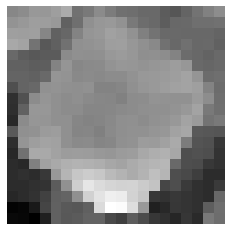

In [66]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")

In [67]:
Num,Row,Col=np.asarray(ww).shape
Idx=[]
New_Colunm=[]

for i in range(Num):
  Media=np.mean(ww[i])
  k=np.where(ww[i].ravel() > Media)
  Idx.append(np.asarray(k).ravel())

Quant=Size*Size
for i in Idx:
  #print(i)
  New_Colunm.append(len(i)/Quant)
print(New_Colunm)

[0.6075, 0.51, 0.4775, 0.495, 0.515, 0.57, 0.425, 0.3225, 0.5375, 0.5075, 0.5825, 0.6175, 0.565, 0.4625, 0.62, 0.63, 0.6, 0.6125, 0.495, 0.4475, 0.44, 0.5, 0.53, 0.6375, 0.5325, 0.5775, 0.4775, 0.4875, 0.535, 0.5225, 0.5225, 0.4475, 0.4625, 0.485, 0.505, 0.385, 0.4575, 0.4675, 0.525, 0.3975, 0.45, 0.3475, 0.4675, 0.465, 0.5325, 0.4, 0.565, 0.4525, 0.515, 0.5, 0.5275, 0.52, 0.425, 0.5125, 0.5075, 0.49, 0.4925, 0.46, 0.6025, 0.4775, 0.44, 0.5125, 0.395, 0.4875, 0.5625, 0.3775, 0.57, 0.49, 0.495, 0.4275, 0.405, 0.4325, 0.4625, 0.4825, 0.5525, 0.5475, 0.4325, 0.52, 0.5175, 0.4825, 0.3925, 0.5025, 0.5, 0.4575, 0.4325, 0.3375, 0.505, 0.525, 0.475, 0.5575, 0.45, 0.3125, 0.48, 0.62, 0.4675, 0.6175, 0.4175, 0.43, 0.4825, 0.4675, 0.5225, 0.4475, 0.51, 0.4975, 0.4775, 0.6525, 0.625, 0.3925, 0.465, 0.6275, 0.495, 0.3625, 0.475, 0.6375, 0.3825, 0.4725, 0.4275, 0.5975, 0.5425, 0.4875, 0.575, 0.46, 0.6425, 0.5625, 0.53, 0.39, 0.5125, 0.4975, 0.4575, 0.525, 0.3275, 0.5925, 0.5225, 0.355, 0.565, 0.4525

In [68]:
print(len(img_name))

540


In [0]:
# ww contain all photos in black and white
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)

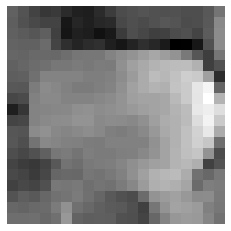

In [70]:
plt.axis("off")
plt.imshow(ww[539], cmap = "gray")

In [71]:
print(img_name)

['Fotos9Amostras/Q6-9-5-G9.jpg', 'Fotos9Amostras/Q6-9-5-I8.jpg', 'Fotos9Amostras/Q6-6-3-I3.jpg', 'Fotos9Amostras/Q6-9-5-G6.jpg', 'Fotos9Amostras/Q6-8-2-G1.jpg', 'Fotos9Amostras/Q6-9-5-B8.jpg', 'Fotos9Amostras/Q6-8-2-B6.jpg', 'Fotos9Amostras/Q6-7-3-I1.jpg', 'Fotos9Amostras/Q6-8-3-I5.jpg', 'Fotos9Amostras/Q6-9-5-I3.jpg', 'Fotos9Amostras/Q6-7-3-G1.jpg', 'Fotos9Amostras/Q6-9-5-G1.jpg', 'Fotos9Amostras/Q6-9-5-I1.jpg', 'Fotos9Amostras/Q6-9-5-I4.jpg', 'Fotos9Amostras/Q6-9-5-G7.jpg', 'Fotos9Amostras/Q6-9-5-G4.jpg', 'Fotos9Amostras/Q6-9-5-G10.jpg', 'Fotos9Amostras/Q6-9-5-G2.jpg', 'Fotos9Amostras/Q6-9-5-I2.jpg', 'Fotos9Amostras/Q6-9-5-B7.jpg', 'Fotos9Amostras/Q6-9-5-I7.jpg', 'Fotos9Amostras/Q6-9-5-G8.jpg', 'Fotos9Amostras/Q6-9-5-I6.jpg', 'Fotos9Amostras/Q6-9-5-G3.jpg', 'Fotos9Amostras/Q6-9-5-I10.jpg', 'Fotos9Amostras/Q6-9-5-I5.jpg', 'Fotos9Amostras/Q6-9-5-G5.jpg', 'Fotos9Amostras/Q6-9-5-B6.jpg', 'Fotos9Amostras/Q6-9-5-B9.jpg', 'Fotos9Amostras/Q6-9-5-I9.jpg', 'Fotos9Amostras/Q6-9-5-B5.jpg', 'Foto

In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [73]:
print(Buraco)
print(Grao)
print(Indef)

['Fotos9Amostras/Q6-9-5-B8.jpg', 'Fotos9Amostras/Q6-8-2-B6.jpg', 'Fotos9Amostras/Q6-9-5-B7.jpg', 'Fotos9Amostras/Q6-9-5-B6.jpg', 'Fotos9Amostras/Q6-9-5-B9.jpg', 'Fotos9Amostras/Q6-9-5-B5.jpg', 'Fotos9Amostras/Q6-6-3-B9.jpg', 'Fotos9Amostras/Q6-6-3-B2.jpg', 'Fotos9Amostras/Q6-6-3-B4.jpg', 'Fotos9Amostras/Q6-6-3-B10.jpg', 'Fotos9Amostras/Q6-6-3-B8.jpg', 'Fotos9Amostras/Q6-6-3-B7.jpg', 'Fotos9Amostras/Q6-6-3-B1.jpg', 'Fotos9Amostras/Q6-6-3-B6.jpg', 'Fotos9Amostras/Q6-6-3-B3.jpg', 'Fotos9Amostras/Q6-6-3-B5.jpg', 'Fotos9Amostras/Q6-1-5-B3.jpg', 'Fotos9Amostras/Q6-7-4-B2.jpg', 'Fotos9Amostras/Q6-2-2-B3.jpg', 'Fotos9Amostras/Q6-2-1-B8.jpg', 'Fotos9Amostras/Q6-4-1-B4.jpg', 'Fotos9Amostras/Q6-8-3-B4.jpg', 'Fotos9Amostras/Q6-7-4-B6.jpg', 'Fotos9Amostras/Q6-8-3-B8.jpg', 'Fotos9Amostras/Q6-5-4-B8.jpg', 'Fotos9Amostras/Q6-6-2-B7.jpg', 'Fotos9Amostras/Q6-5-2-B3.jpg', 'Fotos9Amostras/Q6-6-2-B2.jpg', 'Fotos9Amostras/Q6-9-3-B10.jpg', 'Fotos9Amostras/Q6-8-2-B5.jpg', 'Fotos9Amostras/Q6-3-1-B1.jpg', 'Foto

In [74]:
# find df texture for a given picture
df=Go2Mahotas.Mahotas(ww[0],Size,Sub_Size,Crop,img_name)   # gotoMahotas junta Mahotas com outros calculos
print(df.head())

        ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0  0.052758  203.298611  0.152889  ...     2.785192 -0.743669  0.996773
1  0.055845   31.020833  0.342875  ...     2.670405 -0.703922  0.994526
2  0.063465   32.423611  0.190614  ...     2.681161 -0.684040  0.992619
3  0.060378   30.333333  0.339750  ...     2.689808 -0.673151  0.992236
4  0.052951   48.104167  0.265168  ...     2.868526 -0.716823  0.995305

[5 rows x 13 columns]


In [75]:
Nomes=list(df.columns)
Nomes_2=[]
for it in Nomes:
  Nomes_2.append(it)
Nomes_2.append('colors') # vai adicionar as variaveis novas 
# caso queria adicionar outra variavel alem de cor, tem que modificar
# a lista Nomes_2 com a adicao do nome da variavel a ser adicionada
print(Nomes_2)

['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 'IMC1', 'IMC2', 'colors']


In [0]:
#print(Nomes)

In [77]:
print(len(df['ASM']))

17


In [78]:
# observacao: cuidado para nao confundir Buracos com Buraco
#             cuidado para nao confundir Graos com Grao
#             cuidado para nao confundir Indefs com Indef

j=0
cont=-1
Posicao_Buraco=[]
Buracos=[]
for i in img_name:
  cont=cont+1
  for k in Buraco:
    if(i==k):
      Posicao_Buraco.append(cont)
      Buracos.append(4) # Buracos.append(1)
j=0
cont=-1
Posicao_Grao=[]
Graos=[]
for i in img_name:
  cont=cont+1
  for k in Grao:
    if(i==k):
      Posicao_Grao.append(cont)
      Graos.append(5) # Graos.append(2)

j=0
cont=-1
Posicao_Indef=[]
Indefs=[]
for i in img_name:
  cont=cont+1
  for k in Indef:
    if(i==k):
      Posicao_Indef.append(cont)
      Indefs.append(9) # Indefs.append(3)

print(Posicao_Grao)
print(Posicao_Buraco)
print(Posicao_Indef)

[0, 3, 4, 10, 11, 14, 15, 16, 17, 21, 23, 26, 44, 48, 50, 54, 55, 59, 61, 65, 66, 68, 69, 71, 72, 76, 78, 79, 86, 93, 96, 100, 101, 103, 105, 106, 109, 112, 113, 114, 116, 121, 122, 123, 126, 132, 136, 138, 139, 140, 142, 148, 151, 158, 162, 163, 166, 170, 173, 175, 177, 179, 181, 182, 186, 195, 204, 209, 212, 213, 220, 224, 229, 230, 232, 234, 236, 237, 238, 239, 243, 244, 248, 249, 252, 256, 257, 258, 261, 262, 265, 268, 269, 275, 281, 283, 285, 286, 291, 295, 297, 299, 301, 306, 307, 310, 311, 315, 318, 325, 327, 328, 329, 331, 340, 342, 349, 350, 353, 354, 358, 360, 361, 366, 367, 369, 370, 371, 372, 373, 376, 383, 385, 387, 395, 399, 400, 404, 406, 410, 415, 420, 425, 429, 431, 437, 440, 444, 445, 446, 455, 457, 458, 460, 461, 462, 465, 466, 469, 472, 476, 477, 481, 483, 484, 488, 489, 491, 493, 496, 502, 503, 504, 517, 521, 525, 527, 529, 533, 539]
[5, 6, 19, 27, 28, 30, 35, 36, 39, 40, 41, 45, 46, 49, 52, 53, 57, 58, 60, 70, 74, 80, 83, 91, 94, 97, 102, 104, 107, 108, 111, 115, 

In [0]:
#for i in range(len(Posicao_Buraco)):
#for i in Posicao_Buraco:
#  print(i)

In [0]:
# compara constrast dos tres primeiros buracos

Matriz_X_Buraco=[] #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de buraco

for k in Posicao_Buraco:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    #print(Linha)
    #print("Nomes=",Nomes)
    #print("it=",it)
    #print(df[it])
    Linha.append(np.mean(df[it]))

  Linha.append(New_Colunm[k])
  Matriz_X_Buraco.append(Linha)
  #plt.figure(i+1)
  #plt.plot(df['constrast'])
  #print(len(Matriz_X_Buraco))
#print(pd.DataFrame(Matriz_X_Buraco)) 
#Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco,columns=Nomes)
Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco,columns=Nomes_2) #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de buraco, com os nomes do Índice

In [81]:
# Insert the new column at position 1.
Contraste_Buraco.insert(0,"Type",1,True)
print(Contraste_Buraco.head())

   Type       ASM   constrast  ...      IMC1      IMC2  colors
0     1  0.062500  220.456291  ... -0.663729  0.985292  0.5700
1     1  0.062653   35.939134  ... -0.637104  0.983396  0.4250
2     1  0.056685   94.662582  ... -0.673195  0.989868  0.4475
3     1  0.053672  364.052288  ... -0.730844  0.992383  0.4875
4     1  0.051437  196.939542  ... -0.770135  0.997371  0.5350

[5 rows x 15 columns]


In [0]:
# compara constrast dos graos

Matriz_X_Grao=[] #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de grao

for k in Posicao_Grao:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    Linha.append(np.mean(df[it]))
    
  Linha.append(New_Colunm[k])
  Matriz_X_Grao.append(Linha)
#print(pd.DataFrame(Matriz_X_Grao))

Contraste_Grao=pd.DataFrame(Matriz_X_Grao,columns=Nomes_2) #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de grao, com os nomes do Índice

In [83]:
# Insert the new column at position 1.
Contraste_Grao.insert(0,"Type",2,True)
print(Contraste_Grao.head())

   Type       ASM    constrast  ...      IMC1      IMC2  colors
0     2  0.055652    82.936275  ... -0.704445  0.994020  0.6075
1     2  0.053950   686.425245  ... -0.719483  0.994347  0.4950
2     2  0.050625  1191.962010  ... -0.803702  0.998208  0.5150
3     2  0.053042   323.158497  ... -0.748230  0.995994  0.5825
4     2  0.051590   721.428513  ... -0.779493  0.997592  0.6175

[5 rows x 15 columns]


In [84]:
print(Posicao_Grao)
print(Posicao_Buraco)
print(Posicao_Indef)

[0, 3, 4, 10, 11, 14, 15, 16, 17, 21, 23, 26, 44, 48, 50, 54, 55, 59, 61, 65, 66, 68, 69, 71, 72, 76, 78, 79, 86, 93, 96, 100, 101, 103, 105, 106, 109, 112, 113, 114, 116, 121, 122, 123, 126, 132, 136, 138, 139, 140, 142, 148, 151, 158, 162, 163, 166, 170, 173, 175, 177, 179, 181, 182, 186, 195, 204, 209, 212, 213, 220, 224, 229, 230, 232, 234, 236, 237, 238, 239, 243, 244, 248, 249, 252, 256, 257, 258, 261, 262, 265, 268, 269, 275, 281, 283, 285, 286, 291, 295, 297, 299, 301, 306, 307, 310, 311, 315, 318, 325, 327, 328, 329, 331, 340, 342, 349, 350, 353, 354, 358, 360, 361, 366, 367, 369, 370, 371, 372, 373, 376, 383, 385, 387, 395, 399, 400, 404, 406, 410, 415, 420, 425, 429, 431, 437, 440, 444, 445, 446, 455, 457, 458, 460, 461, 462, 465, 466, 469, 472, 476, 477, 481, 483, 484, 488, 489, 491, 493, 496, 502, 503, 504, 517, 521, 525, 527, 529, 533, 539]
[5, 6, 19, 27, 28, 30, 35, 36, 39, 40, 41, 45, 46, 49, 52, 53, 57, 58, 60, 70, 74, 80, 83, 91, 94, 97, 102, 104, 107, 108, 111, 115, 

In [0]:
# compara constrast dos indefinidos

Matriz_X_Indef=[] #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de indef

for k in Posicao_Indef:
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Linha=[]
  for it in Nomes:
    Linha.append(np.mean(df[it]))
    
  Linha.append(New_Colunm[k])
  Matriz_X_Indef.append(Linha)
Contraste_Indef=pd.DataFrame(Matriz_X_Indef,columns=Nomes_2) #é a matriz com as 14 variaveis (mahotas+cor) para todas as fotos de indef, com os nomes do Índice

In [86]:
# Insert the new column at position 1.
Contraste_Indef.insert(0,"Type",3,True)
print(Contraste_Indef.head())

   Type       ASM    constrast  ...      IMC1      IMC2  colors
0     3  0.053933   104.133170  ... -0.730964  0.992647  0.5100
1     3  0.061581   130.968546  ... -0.664889  0.986649  0.4775
2     3  0.053468  3428.661356  ... -0.763836  0.995966  0.3225
3     3  0.056021    23.720997  ... -0.693172  0.991625  0.5375
4     3  0.062591   139.585376  ... -0.656057  0.962582  0.5075

[5 rows x 15 columns]


In [87]:
print(Contraste_Buraco.head())

   Type       ASM   constrast  ...      IMC1      IMC2  colors
0     1  0.062500  220.456291  ... -0.663729  0.985292  0.5700
1     1  0.062653   35.939134  ... -0.637104  0.983396  0.4250
2     1  0.056685   94.662582  ... -0.673195  0.989868  0.4475
3     1  0.053672  364.052288  ... -0.730844  0.992383  0.4875
4     1  0.051437  196.939542  ... -0.770135  0.997371  0.5350

[5 rows x 15 columns]


In [88]:
print(Contraste_Grao.head())

   Type       ASM    constrast  ...      IMC1      IMC2  colors
0     2  0.055652    82.936275  ... -0.704445  0.994020  0.6075
1     2  0.053950   686.425245  ... -0.719483  0.994347  0.4950
2     2  0.050625  1191.962010  ... -0.803702  0.998208  0.5150
3     2  0.053042   323.158497  ... -0.748230  0.995994  0.5825
4     2  0.051590   721.428513  ... -0.779493  0.997592  0.6175

[5 rows x 15 columns]


In [89]:
print(Contraste_Indef.head())

   Type       ASM    constrast  ...      IMC1      IMC2  colors
0     3  0.053933   104.133170  ... -0.730964  0.992647  0.5100
1     3  0.061581   130.968546  ... -0.664889  0.986649  0.4775
2     3  0.053468  3428.661356  ... -0.763836  0.995966  0.3225
3     3  0.056021    23.720997  ... -0.693172  0.991625  0.5375
4     3  0.062591   139.585376  ... -0.656057  0.962582  0.5075

[5 rows x 15 columns]


In [0]:
Contraste_Completo_mar_2020 = pd.concat([Contraste_Buraco, Contraste_Grao, Contraste_Indef], axis=0)

In [91]:
print(Contraste_Completo_mar_2020)

     Type       ASM   constrast  ...      IMC1      IMC2  colors
0       1  0.062500  220.456291  ... -0.663729  0.985292  0.5700
1       1  0.062653   35.939134  ... -0.637104  0.983396  0.4250
2       1  0.056685   94.662582  ... -0.673195  0.989868  0.4475
3       1  0.053672  364.052288  ... -0.730844  0.992383  0.4875
4       1  0.051437  196.939542  ... -0.770135  0.997371  0.5350
..    ...       ...         ...  ...       ...       ...     ...
175     3  0.050926  410.030229  ... -0.780248  0.997502  0.5000
176     3  0.053093  585.907680  ... -0.761510  0.994935  0.5550
177     3  0.060123   16.233660  ... -0.607501  0.978556  0.6150
178     3  0.056792  147.247958  ... -0.699026  0.991186  0.4900
179     3  0.053984  484.488971  ... -0.759572  0.996433  0.4625

[540 rows x 15 columns]


In [92]:
# found drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [0]:
# get csv file
Contraste_Completo_mar_2020.to_csv('Contraste_Completo_mar_2020.csv', float_format="%.5f")

In [0]:

# save in drive
!cp Contraste_Completo_mar_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/